<a href="https://colab.research.google.com/github/Janu2331/Introduction-to-Data-science-/blob/main/Predicted_House_size_vs_House_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#Terms in ML
#1. Collection : data used for training, validating,and testing the machine learning model

#2. Feature (X): Independent variable or input variable - used to predict the target variable

#3. Target (Y) : dependent variable or output that we want to predict
#example: predicting no of bed rooms

#4. Training data : subset of dataset used to train the model

#5. Testing data : subset of dataset used to validate the trained model

#6. Model : Mathematical representation of relationship between feature and target

#7. Supervised learning (SL) : Training the data based on label data/model learns from known/ labeled data.
# 8. Regression: Method to predict continuous values from a model - supervised learning
#9.Overfitting : when a model learns from training data too well,includes noise-peform poorly new data
#10.underfitting: model is too simpler and does not capture pattern in data

##cateories in machine learning:
#1.supervised learning:
#   Model learns from labeled data - i/o pairs
#   Example: Linear registration, Decision trees, Random forest, SVM
#   Best use case so far : House price prediction based on previous/historical data

# 2. Unsupervised learning :
Model finds new patterns in unlabeled data without predefined data/lables
#   Example : Clustering (k means), PCA
#   Use case : Customer segmentation in marketing

# 3. Reinforcement learning :
#   Model learns by interacting with environment and receiving the regards or penalties
#   Example : Deep learning,AlphaGo...
# Best use case : self car driving Vehicles, self learning AI bots , SLAM

In [ ]:
$ Example: predicting the House price - Random dataset - generated

# Steps :
# 1. Generate a random dataset
# 2. Train a ML model - linear regression
# 3. Evaluate the model
# 4. Make prediction

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [11]:

#step1:Generate a random dataset
np.random.seed(42)#used to set same sequence of values for the random package
numSamples=100
size=np.random.randint(800,5000,numSamples)
bedrooms =np.random.randint(1,6,numSamples)
washrooms=np.random.randint(1,8,numSamples)
localityScore=np.random.randint(1,10,numSamples)
#Generate house prices with randomness
houseprice = (size* 3000) + (bedrooms *50000) + (washrooms * 30000) + (localityScore * 70000) + np.random.randint(-50000, 50000, numSamples)
#create a DataFrame
df=pd.DataFrame(
{
      'Size':size,
      'Bedrooms':bedrooms,
      'Washrooms':washrooms,
      'LocalityScore':localityScore,
      'Price':houseprice
}
)

In [12]:
# step2 : Train a ML Model - linear regression
# package (installation) requirements :
# pip install scikit-learn


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [18]:
x = df[['Size','Bedrooms','Washrooms','LocalityScore']]
y = df['Price']

In [27]:
df

,Size,Bedrooms,Washrooms,LocalityScore,Price
0,1660,5,2,9,5964758
1,4572,4,7,5,14517747
2,3892,5,7,8,12708752
3,1266,5,6,1,4304573
4,4244,3,2,5,13301101
...,...,...,...,...,...
95,1006,1,6,5,3591286
96,2284,3,5,1,7240450
97,1663,4,6,4,5620352
98,3590,1,3,5,11265069


In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [25]:
#step 3: Evaluate model
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 25385.345481365337
Mean Squared Error: 796791448.4323988
Root Mean Squared Error: 28227.494547557686


In [26]:
#step 4 make prediction
newHouse = np.array([[4000, 4, 6, 10]])
predictedPrice = model.predict(newHouse)
print(f'Predicted Price: {predictedPrice[0]}')

Predicted Price: 13069094.887436867


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [31]:
xsorted = np.sort(x,axis=0 )
ypred = model.predict(xsorted)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<ipython-input-40-7018dae58594>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0.5, 1.0, 'Predicted House Size vs House Price')

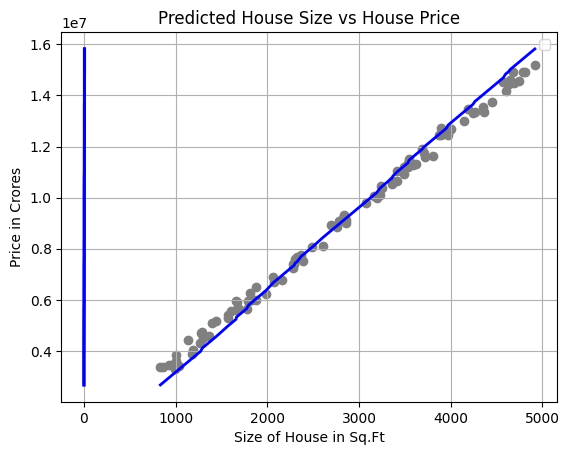

In [40]:

plt.scatter(df['Size'], df['Price'], color='grey')
plt.plot(xsorted, ypred, color='blue', linewidth = 2)
plt.xlabel('Size of House in Sq.Ft')
plt.ylabel('Price in Crores')
plt.legend()
plt.grid(True)
plt.title('Predicted House Size vs House Price')